In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

In [2]:
#Importing Data
data=pd.read_csv("CO2 Emissions_India.csv")

In [3]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# EDA

In [4]:
# Checking for the data types information-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
# Checking for total null valuesin all-
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
# Statistical parameter analysis of all features-
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [7]:
# checking for unique variables
print(data['Make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [8]:
# Putting different transmission sub-catagories-

data['Transmission'] = np.where(data['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(['M5','M6','M7']),'Manual',data['Transmission'])

print(data['Transmission'].unique())

['Automatic of Selective type' 'Manual' 'CVT' 'Automated Manual'
 'Automatic']


In [9]:
# Renaming fuel types for understanding

print(data['Fuel Type'].value_counts())

data['Fuel Type']= np.where(data['Fuel Type']=='X','Regular gasoline',data['Fuel Type'])
data['Fuel Type']= np.where(data['Fuel Type']=='Z','Premium gasoline',data['Fuel Type'])
data['Fuel Type']= np.where(data['Fuel Type']=='E','Ethanol',data['Fuel Type'])
data['Fuel Type']= np.where(data['Fuel Type']=='D','Diesel',data['Fuel Type'])
data['Fuel Type']= np.where(data['Fuel Type']=='N','Natural gas',data['Fuel Type'])

print(data['Fuel Type'].unique())
print(data['Vehicle Class'].unique())

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64
['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [10]:
data.shape

(7385, 12)

In [11]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244


In [12]:
data.corr()['CO2 Emissions(g/km)'].sort_values()

Fuel Consumption Comb (mpg)        -0.907426
Cylinders                           0.832644
Engine Size(L)                      0.851145
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption City (L/100 km)    0.919592
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

In [13]:
# Correlation between features and label

Coorrelation=data.corr()

Text(0.5, 1.0, 'Correlation Matrix')

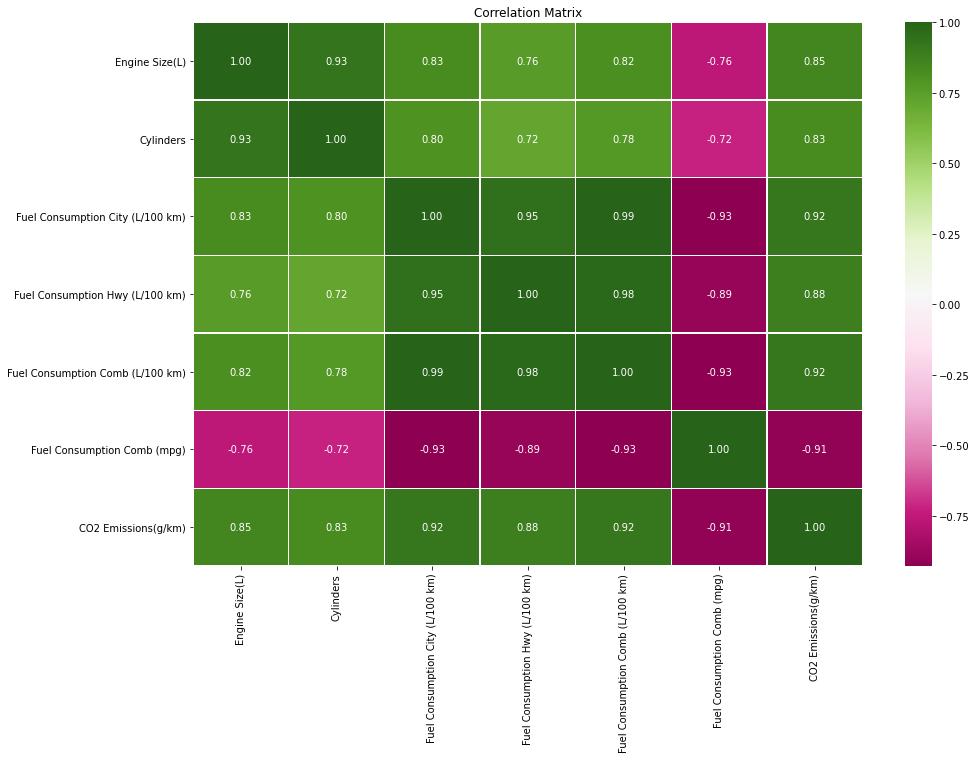

In [14]:
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(Coorrelation, cmap='PiYG', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation Matrix')

array([[<AxesSubplot:title={'center':'Engine Size(L)'}>,
        <AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Fuel Consumption City (L/100 km)'}>],
       [<AxesSubplot:title={'center':'Fuel Consumption Hwy (L/100 km)'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb (L/100 km)'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb (mpg)'}>],
       [<AxesSubplot:title={'center':'CO2 Emissions(g/km)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

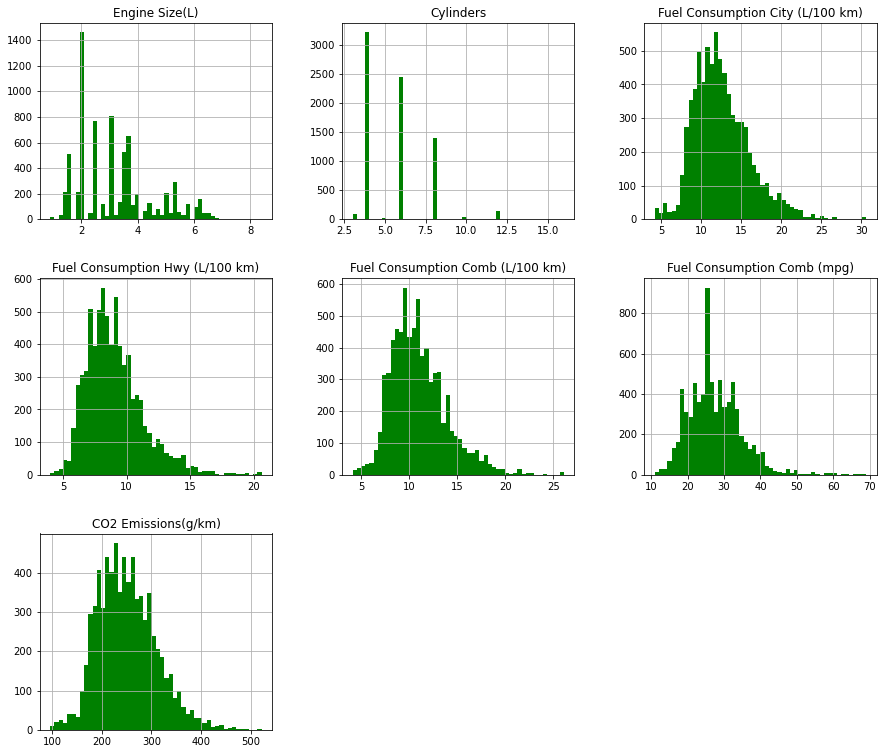

In [15]:
# Distribution of numerical features

data.hist(figsize=(15,13),color="g",bins=50)
# Numerical features are little right skewed.

In [16]:
# Frequency Distribution

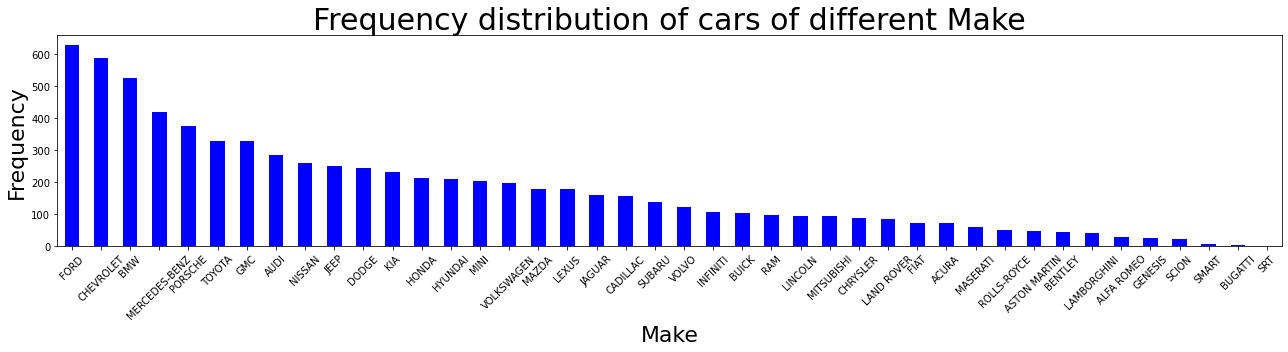

In [17]:
#Make
plt.figure(figsize=(18,5))

data.groupby('Make')['Make'].count().sort_values(ascending=False).plot(kind='bar',color='b')

plt.title('Frequency distribution of cars of different Make', fontsize=30)
plt.xlabel('Make', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

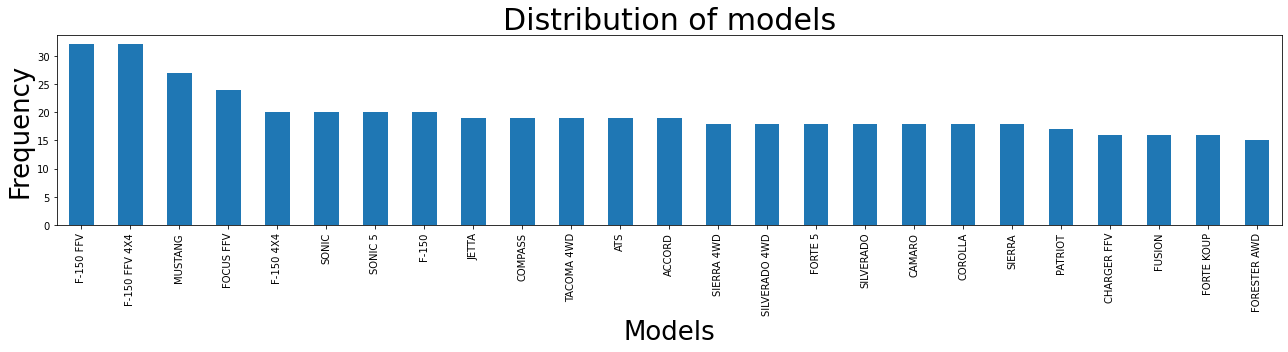

In [18]:
# MODEL
plt.figure(figsize=(18,5))

data.groupby('Model')['Model'].count().sort_values(ascending=False)[:25].plot(kind='bar')

plt.title('Distribution of models', fontsize=30)
plt.xlabel('Models', fontsize=26)
plt.ylabel('Frequency', fontsize=26)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

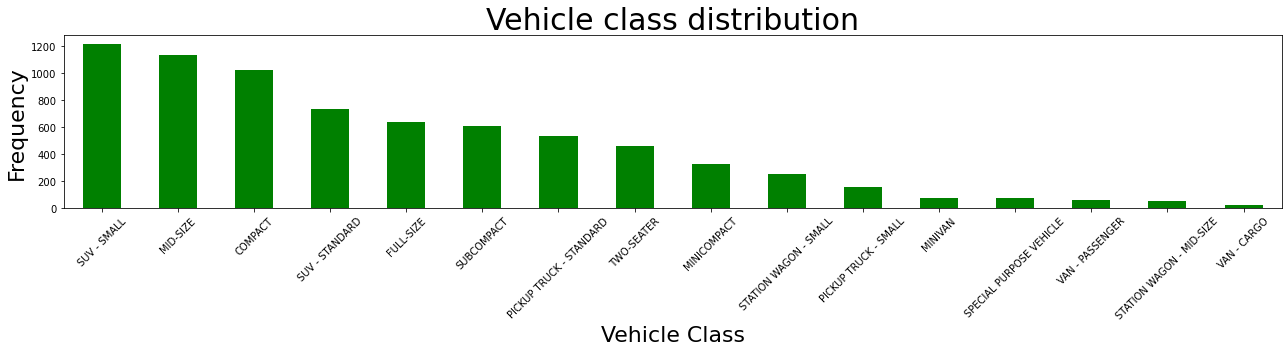

In [19]:
# Vehicle Class

plt.figure(figsize=(18,5))

data.groupby('Vehicle Class')['Vehicle Class'].count().sort_values(ascending=False).plot(kind='bar', color='green')

plt.title('Vehicle class distribution', fontsize=30)
plt.xlabel('Vehicle Class', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

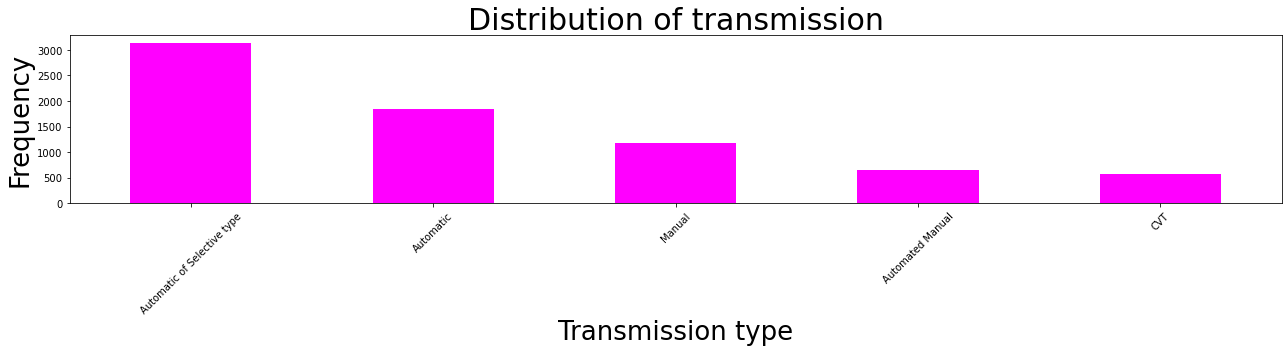

In [20]:
# Transmission

plt.figure(figsize=(18,5))

data.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar', color='magenta')

plt.title('Distribution of transmission', fontsize=30)
plt.xlabel('Transmission type', fontsize=26)
plt.ylabel('Frequency', fontsize=26)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

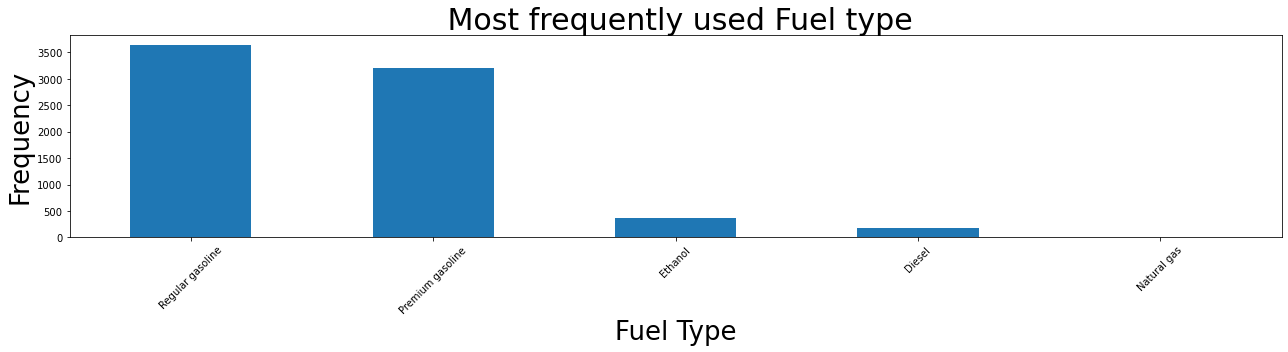

In [21]:
# Fuel Type

plt.figure(figsize=(18,5))

data.groupby('Fuel Type')['Fuel Type'].count().sort_values(ascending=False).plot(kind='bar')

plt.title(' Most frequently used Fuel type', fontsize=30)
plt.xlabel('Fuel Type', fontsize=26)
plt.ylabel('Frequency', fontsize=26)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

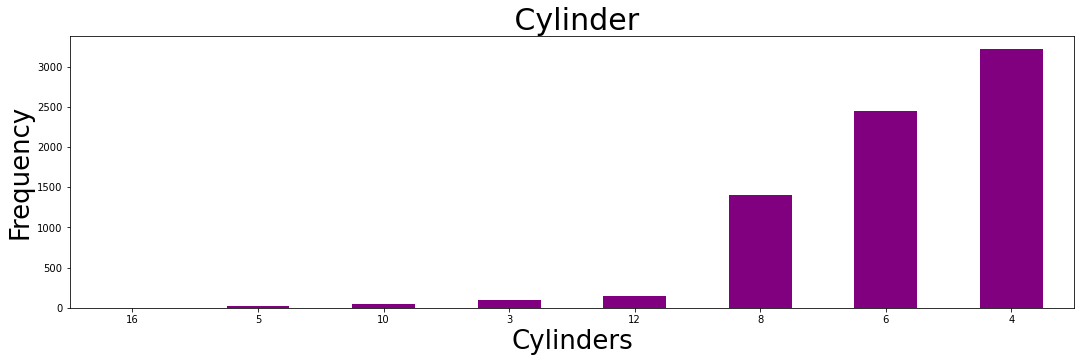

In [22]:
# Cylinders

plt.figure(figsize=(18,5))

data.groupby('Cylinders')['Cylinders'].count().sort_values(ascending=True).plot(kind='bar', color='purple')

plt.title(' Cylinder', fontsize=30)
plt.xlabel('Cylinders', fontsize=26)
plt.ylabel('Frequency', fontsize=26)
plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()

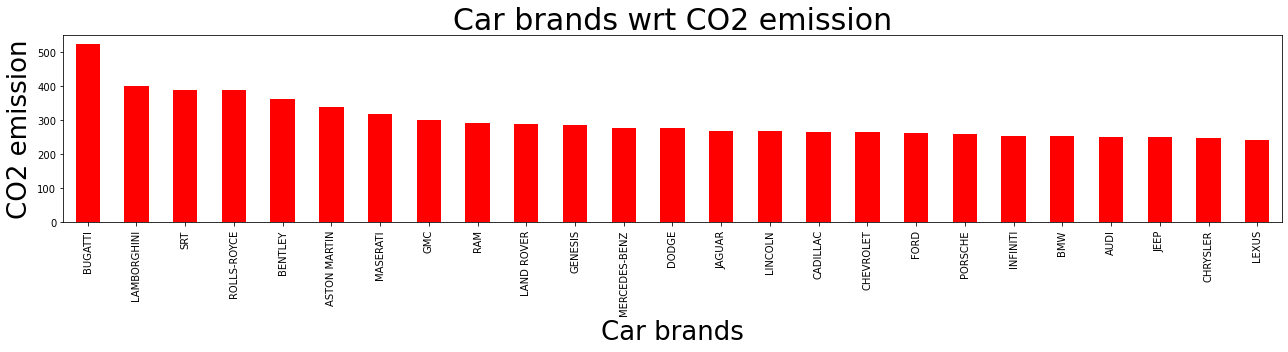

In [23]:
# Visualisation wrt CO2 emision

plt.figure(figsize=(18,5))

data.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')

plt.title('Car brands wrt CO2 emission', fontsize=30)
plt.xlabel('Car brands', fontsize=26)
plt.ylabel('CO2 emission', fontsize=26)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

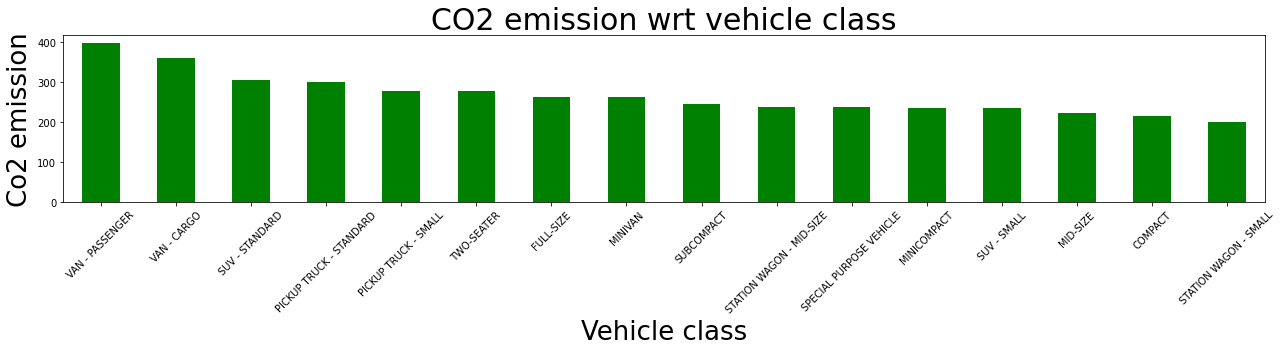

In [24]:
#Vehicle Class
plt.figure(figsize=(18,5))

data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).plot(kind='bar',color='g')

plt.title('CO2 emission wrt vehicle class', fontsize=30)
plt.xlabel('Vehicle class' , fontsize=26)
plt.ylabel('Co2 emission', fontsize=26)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

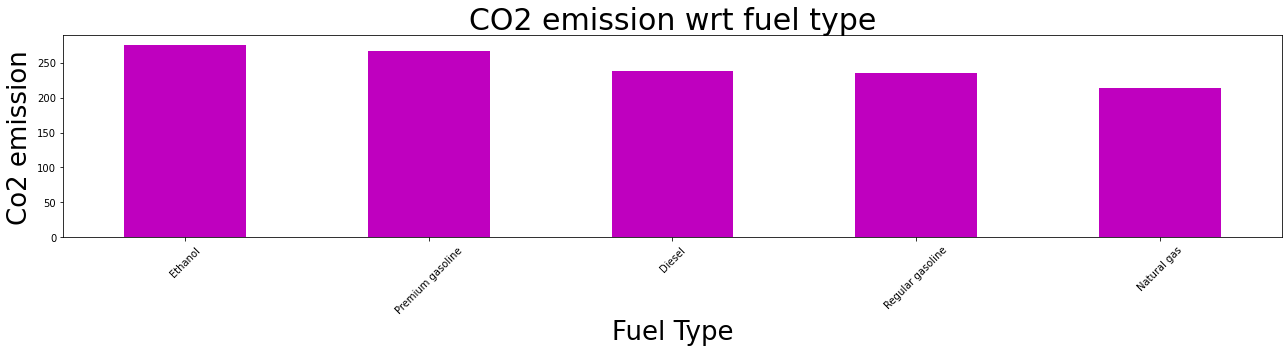

In [25]:
# Fuel Type
plt.figure(figsize=(18,5))

data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).plot(kind='bar',color='m')

plt.title('CO2 emission wrt fuel type', fontsize=30)
plt.xlabel('Fuel Type', fontsize=26)
plt.ylabel('Co2 emission', fontsize=26)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

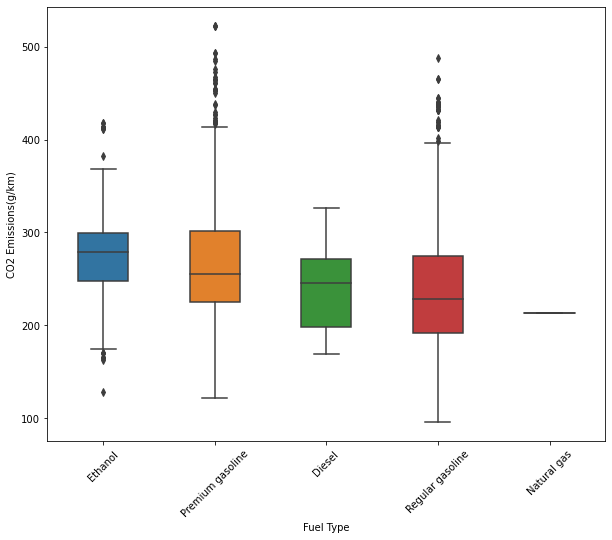

In [26]:
fuel_type = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].median().sort_values(ascending=False).index
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Fuel Type', y='CO2 Emissions(g/km)', data =data, order=fuel_type, width=0.45)
plt.xticks(rotation=45, horizontalalignment='center')

plt.show()

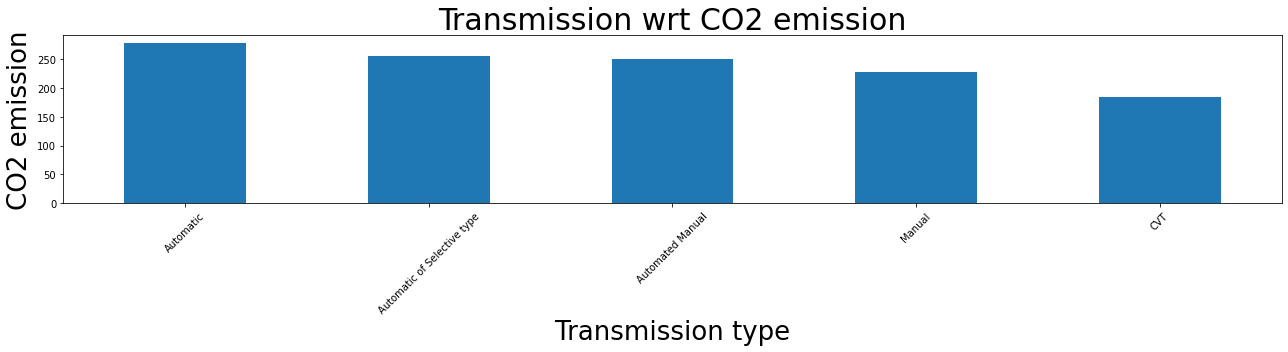

In [27]:
plt.figure(figsize=(18,5))

data.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Transmission wrt CO2 emission', fontsize=30)
plt.xlabel('Transmission type', fontsize=26)
plt.ylabel('CO2 emission', fontsize=26)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

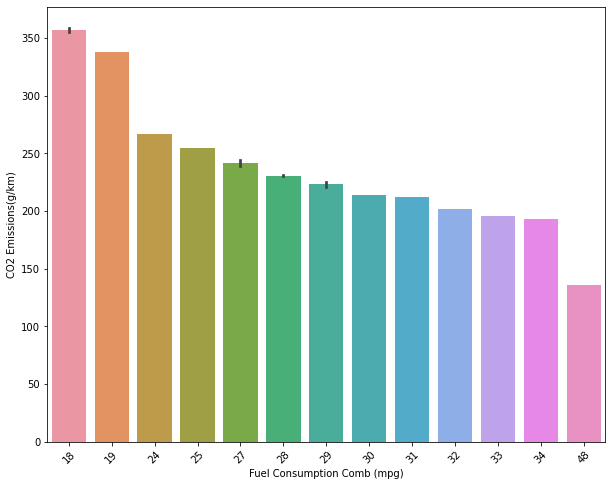

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', data =data[:25])

plt.xticks(rotation=45)
plt.show()

<Figure size 720x576 with 0 Axes>

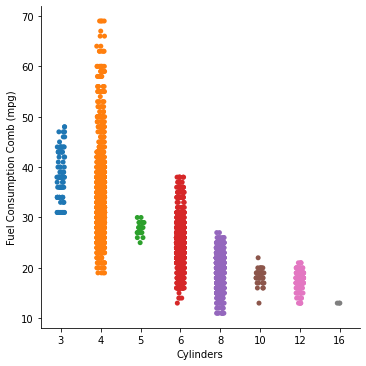

In [29]:
plt.figure(figsize=(10,8))

sns.catplot(x='Cylinders', y='Fuel Consumption Comb (mpg)',data = data)

plt.show()  

<Figure size 720x576 with 0 Axes>

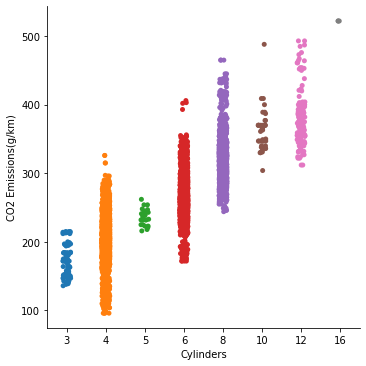

In [30]:
plt.figure(figsize=(10,8))

sns.catplot(x='Cylinders', y='CO2 Emissions(g/km)',data = data)

plt.show()                                                         # co2 emission increases with increasing no of cylinders

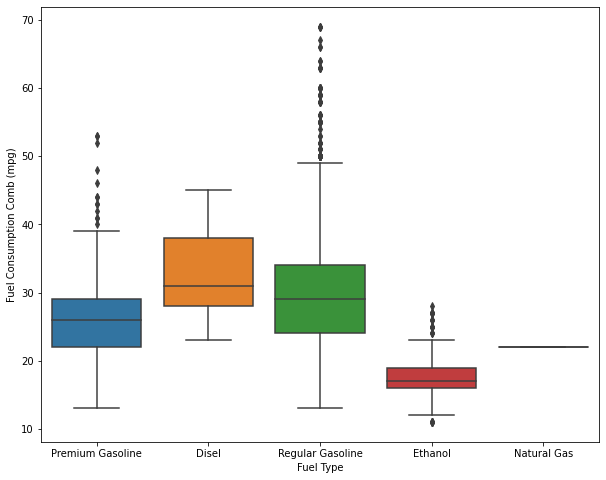

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Fuel Type', y='Fuel Consumption Comb (mpg)', data =data)

plt.xticks([0,1,2,3,4],['Premium Gasoline','Disel', 'Regular Gasoline','Ethanol', 'Natural Gas'])
plt.show()                                                                                            # efficiency of fuel 

# DATA PREPROCESSING

In [32]:
# DATA PREPROCESSING

data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244


In [33]:
data['Transmission'].value_counts()

Automatic of Selective type    3127
Automatic                      1851
Manual                         1185
Automated Manual                646
CVT                             576
Name: Transmission, dtype: int64

In [34]:
data['Fuel Type'].value_counts()

Regular gasoline    3637
Premium gasoline    3202
Ethanol              370
Diesel               175
Natural gas            1
Name: Fuel Type, dtype: int64

In [35]:
# Dropping natural gas as there is only one data we have which would not make much difference in modelling

data_N = data[data['Fuel Type']== 'Natural gas']

ind = data_N.index

data_N

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,Automatic of Selective type,Natural gas,15.2,9.5,12.7,22,213


In [36]:
for i in ind:
    data.drop(i, axis=0, inplace=True)     

In [37]:
data[data['Fuel Type']=='Natural gas']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [38]:
# creating dummy variables of fuel type and transmission (catagorical features)

dummy_v =pd.get_dummies(data['Fuel Type'], prefix='Fuel', drop_first=True)
dummyv = pd.get_dummies(data["Transmission"], drop_first=True)
dummy_v.head()


,Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [39]:
dummyv.head()

,Automatic,Automatic of Selective type,CVT,Manual
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [40]:
df2 = [data, dummy_v,dummyv]

ds = pd.concat(df2, axis=1)
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,0,1,0,0,1,0,0
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,0,1,0,0,0,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,0,1,0,0,0,1,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,0,1,0,0,1,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,0,1,0,0,1,0,0


In [41]:
ds

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,ACURA,ILX,COMPACT,2.0,4,Automatic of Selective type,Premium gasoline,9.9,6.7,8.5,33,196,0,1,0,0,1,0,0
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,11.2,7.7,9.6,29,221,0,1,0,0,0,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Premium gasoline,6.0,5.8,5.9,48,136,0,1,0,0,0,1,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.7,9.1,11.1,25,255,0,1,0,0,1,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic of Selective type,Premium gasoline,12.1,8.7,10.6,27,244,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,10.7,7.7,9.4,30,219,0,1,0,0,1,0,0
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,0,1,0,0,1,0,0
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic of Selective type,Premium gasoline,11.7,8.6,10.3,27,240,0,1,0,0,1,0,0
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic of Selective type,Premium gasoline,11.2,8.3,9.9,29,232,0,1,0,0,1,0,0


In [42]:
ds.drop(['Fuel Type'], inplace=True, axis=1)
ds.drop(['Transmission'], inplace=True, axis=1)

In [43]:
df_freq = ds['Make'].value_counts().to_dict()
mod_freq = ds['Model'].value_counts().to_dict()
veh_freq = ds['Vehicle Class'].value_counts().to_dict()

In [44]:
ds['Make'] = ds['Make'].map(df_freq)
ds['Model'] = ds['Model'].map(mod_freq)
ds['Vehicle Class'] = ds['Vehicle Class'].map(veh_freq)

In [45]:
ds.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,72,9,1022,2.0,4,9.9,6.7,8.5,33,196,0,1,0,0,1,0,0
1,72,9,1022,2.4,4,11.2,7.7,9.6,29,221,0,1,0,0,0,0,1
2,72,2,1022,1.5,4,6.0,5.8,5.9,48,136,0,1,0,0,0,1,0
3,72,1,1217,3.5,6,12.7,9.1,11.1,25,255,0,1,0,0,1,0,0
4,72,7,1217,3.5,6,12.1,8.7,10.6,27,244,0,1,0,0,1,0,0


In [46]:
X = ds.drop('CO2 Emissions(g/km)', axis=1)
y = ds['CO2 Emissions(g/km)']

In [47]:
X.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel_Ethanol,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,72,9,1022,2.0,4,9.9,6.7,8.5,33,0,1,0,0,1,0,0
1,72,9,1022,2.4,4,11.2,7.7,9.6,29,0,1,0,0,0,0,1
2,72,2,1022,1.5,4,6.0,5.8,5.9,48,0,1,0,0,0,1,0
3,72,1,1217,3.5,6,12.7,9.1,11.1,25,0,1,0,0,1,0,0
4,72,7,1217,3.5,6,12.1,8.7,10.6,27,0,1,0,0,1,0,0


In [48]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

In [49]:
ds.shape

(7384, 17)

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
ranked_feature = SelectKBest(score_func = chi2, k='all')
ordered_feature = ranked_feature.fit(X, y)


In [52]:
top_feat = pd.DataFrame(ordered_feature.scores_ , columns=['score'])
top_feat['variables'] = X.columns

In [53]:
top_feat.sort_values(by='score', ascending=False)

,score,variables
2,173723.188600,Vehicle Class
0,95021.040629,Make
8,13236.852695,Fuel Consumption Comb (mpg)
5,6232.307799,Fuel Consumption City (L/100 km)
7,4862.577319,Fuel Consumption Comb (L/100 km)
4,3412.144543,Cylinders
3,3394.028026,Engine Size(L)
6,3293.816329,Fuel Consumption Hwy (L/100 km)
1,2612.972867,Model
14,1938.744672,CVT


In [54]:
# splitting of trainnng testing set into X and y:

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5907, 16)
(1477, 16)
(5907,)
(1477,)


In [56]:
y_test.head()

5632    368
1550    290
1128    382
6498    211
3270    193
Name: CO2 Emissions(g/km), dtype: int64

# FEATURE SCALING USING STANDARDIZATION

In [57]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler

In [58]:
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
X_train

array([[-0.27521116, -0.68670295, -1.80962504, ..., -0.85157221,
        -0.29299418, -0.44024503],
       [-0.54676246, -0.68670295, -0.42577231, ...,  1.17429853,
        -0.29299418, -0.44024503],
       [ 1.2100082 , -0.87774305, -0.52091218, ...,  1.17429853,
        -0.29299418, -0.44024503],
       ...,
       [ 0.11826113, -0.30462276, -0.14900176, ..., -0.85157221,
         3.4130371 , -0.44024503],
       [-0.27521116, -0.30462276,  1.24061702, ..., -0.85157221,
         3.4130371 , -0.44024503],
       [-1.17299301, -1.06878314, -0.71695798, ..., -0.85157221,
        -0.29299418, -0.44024503]])

In [60]:
data['CO2 Emissions(g/km)'].mean()

250.58978873239437

# Application of Regression Model

### 1. Linear Regression:

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
model.intercept_

250.98357880480785

In [63]:
model.coef_

array([  0.09846243,  -0.09126632,  -0.03196586,   0.25410999,
         2.17469937,  24.28719842,  13.07132844,  20.53745833,
        -6.35439345, -30.19620392, -15.35456651, -15.09009955,
        -0.35425518,  -0.32284677,  -0.17696755,  -0.3645601 ])

In [64]:
y_predict = model.predict(X_test)
y_predict

array([359.06209907, 292.97346311, 377.59960241, ..., 341.77783102,
       193.05390931, 177.97061893])

In [65]:
np.sqrt(mean_squared_error(y_test, y_predict))

4.918260935039379

In [66]:
r2_score(y_test, y_predict)

0.993041824997087

In [67]:
frames = [y_predict, y_test.values]
result_predict = pd.DataFrame(data=frames)
result_predict = result_predict.T

In [68]:
lin_predict = result_predict.rename(columns={0: 'predicted_values',1:'real_values'})
lin_predict['predicted_values'] = lin_predict['predicted_values'].map(lambda x: round(x,2))

lin_predict

,predicted_values,real_values
0,359.06,368.0
1,292.97,290.0
2,377.60,382.0
3,210.80,211.0
4,192.94,193.0
...,...,...
1472,233.49,235.0
1473,262.28,263.0
1474,341.78,346.0
1475,193.05,193.0


In [69]:
lin_predict['diff'] = abs(lin_predict['predicted_values'] - lin_predict['real_values'])

print('mean diff: ', (abs(lin_predict['diff']).mean()))

mean diff:  2.979058903182132


In [70]:
lin_predict.head(10)

,predicted_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.60,382.0,4.40
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


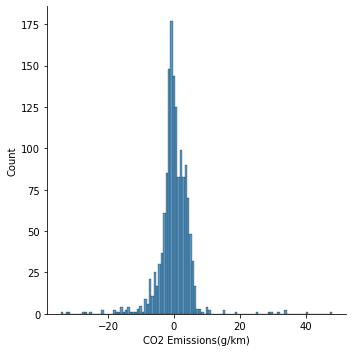

In [71]:
sns.displot(y_predict-y_test)

Text(0, 0.5, 'y_pred')

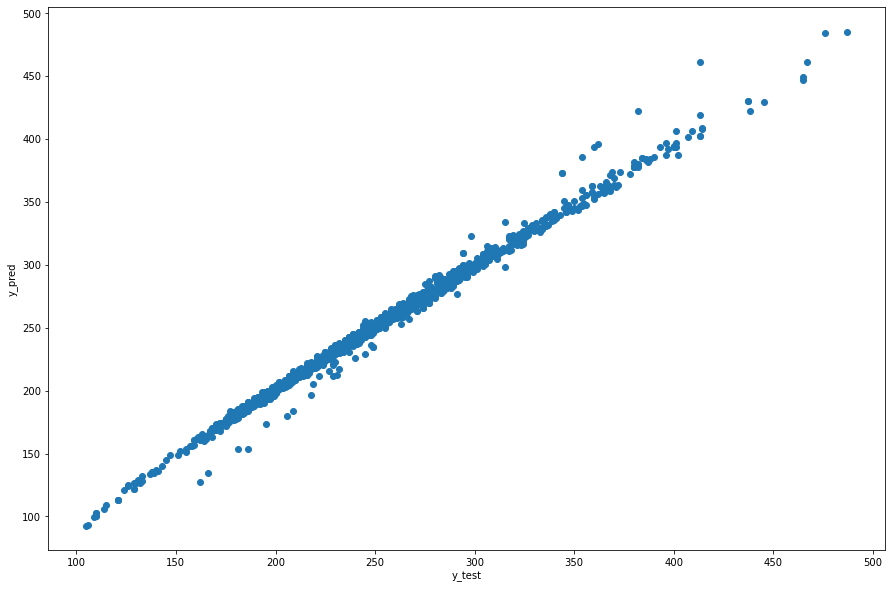

In [72]:
plt.scatter( y_test,y_predict)
plt.xlabel('y_test')
plt.ylabel('y_pred')

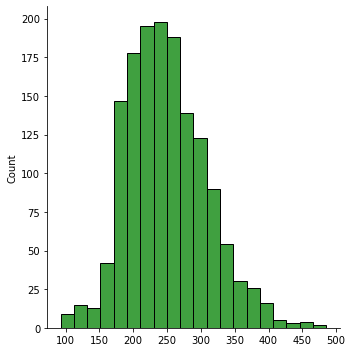

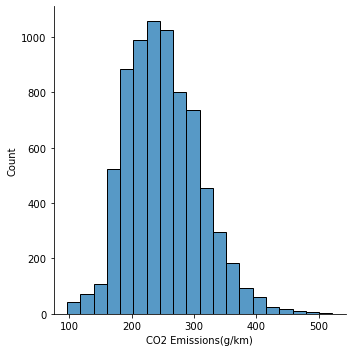

In [73]:
sns.displot(y_predict, bins=20,color='g')
plt.show()
sns.displot(data['CO2 Emissions(g/km)'], bins=20)
plt.show()

# Decision Tree Regression:

In [74]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [75]:
dtr_pred = model.predict(X_test)
dtr_pred

array([357.        , 290.        , 382.        , ..., 342.66666667,
       193.        , 177.        ])

In [76]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

3.629475553464912

In [77]:
r2_score(y_test, dtr_pred)

0.9962106914830545

In [78]:
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,357.0,368.0
1,290.0,290.0
2,382.0,382.0
3,211.0,211.0
4,193.0,193.0


In [79]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())

mean diff:  1.7914691943127963


In [80]:
dtr_pred.head(10)

,pred_values,real_values,diff
0,357.0,368.0,11.0
1,290.0,290.0,0.0
2,382.0,382.0,0.0
3,211.0,211.0,0.0
4,193.0,193.0,0.0
5,244.0,244.0,0.0
6,210.0,210.0,0.0
7,174.0,174.0,0.0
8,267.0,268.0,1.0
9,304.6,305.0,0.4


# Random Forest Reeegression:

In [81]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([358.976     , 290.64766667, 383.46      , ..., 343.39452381,
       189.9905    , 177.52      ])

In [83]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 3.2041
MAE: 1.9641
R2_score: 0.9970


In [84]:
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,358.976000,368.0
1,290.647667,290.0
2,383.460000,382.0
3,211.120000,211.0
4,192.640000,193.0


In [85]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  1.9641232227488168


In [86]:
models =['LinReg','DT', 'RF']

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})




for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
        
    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
       
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    

In [87]:
frame

,models,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Linear Regression,4.962163,2.996013,0.992778,4.918261,2.979052,0.993042
1,Decision Tree Regression,0.939813,0.318859,0.999741,3.664870,1.828696,0.996136
2,Random Forest Regression,1.459469,0.863262,0.999375,3.167093,1.946509,0.997115
